# MILITARY POWER - Whole World

 Dataset is a composite index of military capabilities of a country. It is calculated by adding the values of weighted indicators from three major categories: military capability, force size, and finance. The military capability category is the most heavily weighted, and it includes the number of active personnel, tanks, aircraft, attack helicopters, aircraft carriers, and submarines. The force size category includes the total military personnel, reserve personnel, paramilitary personnel, and the total number of aircraft, helicopters, tanks, and naval assets. The finance category includes the defense budget, external debt, and external financing. The final value is normalized to a value from 0 to 100, with 100 being the best possible score. The index is intended to help governments and analysts assess the military power of a country, and it is not intended to be a definitive assessment of a country's military capabilities. 

## Import Libraries

In [1]:
import pandas as pd
import warnings 
import plotly.io as pio 
from yellowbrick.cluster import KElbowVisualizer


pio.templates.default = "plotly_white"
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

## Load data 

In [2]:
df = pd.read_excel("World military power.xlsx", skiprows=1)

## EDAs

In [3]:
df["Total Coastline Coverage value"].value_counts()

Total Coastline Coverage value
853     2
193     2
225     2
26      2
400     2
       ..
2389    1
310     1
885     1
4853    1
1906    1
Name: count, Length: 104, dtype: int64

In [4]:
df.shape

(138, 60)

In [5]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [6]:
df.rename(columns={"Military Strength": "Countries"}, inplace=True)

In [7]:
df.head()

,Countries,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [8]:
columns_to_drop = [col for i, col in enumerate(df.columns) if i % 2 == 0 and i != 0]
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.shape

(138, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries                                138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [11]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

In [12]:
# print all types of df' s columns

for col in df.columns:
    if col == 'Countries':
        continue
    if df[col].dtype != 'object':
        continue
    print(f"column name: {col}, value: {df[col]}")
    df[col] = df[col].astype(str)
    df[col] = df[col].apply(lambda x: 0 if x == "nan" else x)
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].str.replace('.', '')
    df[col] = pd.to_numeric(df[col])
    df[col] = df[col].apply(lambda x: 0 if x is None else x)

column name: defense spending budget value, value: 0      12,00,00,00,000
1         25,00,00,000
2      13,00,00,00,000
3       7,00,00,00,000
4       4,20,00,00,000
            ...       
133       74,50,00,000
134     5,50,00,00,000
135     1,40,00,00,000
136        4,00,00,000
137       10,00,00,000
Name: defense spending budget value, Length: 138, dtype: object
column name: External Debt value, value: 0         2,84,00,00,000
1         9,50,50,00,000
2         6,26,00,00,000
3        42,08,00,00,000
4      2,14,90,00,00,000
             ...        
133    1,00,30,00,00,000
134      96,58,00,00,000
135       7,06,80,00,000
136      11,66,00,00,000
137       9,35,70,00,000
Name: External Debt value, Length: 138, dtype: object
column name: Oil Production value, value: 0              0
1          16000
2      13,06,000
3      16,66,000
4       4,79,400
         ...    
133    20,07,000
134     2,71,400
135        12260
136            0
137            0
Name: Oil Production value, Lengt

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries                                138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [14]:
# defense spending budget value
# External Debt value
# Oil Production value
# Oil Consumption value
# Proven Oil Reserves value
# Available Manpower value
# Total Population value
# Total Square Land Area value
# Total Coastline Coverage value
# Total Waterway Coverage value


# df["Total Coastline Coverage value"] 

# df["Total Coastline Coverage value"] = df["Total Coastline Coverage value"].astype(str)
# df["Total Coastline Coverage value"] = df["Total Coastline Coverage value"].str.replace(',', '')
# df["Total Coastline Coverage value"] = df["Total Coastline Coverage value"].str.replace('.', '')
 

In [15]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

In [16]:
for col in df.columns:
    if col == 'Countries':
        continue
    df[col] = df[col].fillna(0)


In [17]:
df.sample(10)

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
43,Germany,0.2186,712,128,74,71,26,386,56,245,4583,108,0,38,80.0,0.0,6.0,0.0,9.0,50000000000,5326000000000,539,43410,2500000,145400000,37010559,80457737,357022,2389.0,7467,3694.0
101,Russia,0.0681,4163,873,742,424,497,1522,531,12950,27038,6083,4465,3860,603.0,1.0,62.0,16.0,10.0,48000000000,539600000000,1218,10580000,3225000,80000000000,69640160,142122776,17098242,37653.0,102000,22408.0
82,Netherlands,0.5919,168,61,1,4,27,75,28,18,1546,57,160,0,63.0,0.0,4.0,0.0,6.0,12419000000,4063000000000,29,18170,840000,113200000,7820960,17151228,41543,451.0,6237,1053.0
10,Bangladesh,0.7066,177,44,0,11,57,67,0,276,1230,18,419,72,112.0,0.0,2.0,0.0,8.0,3800000000,50260000000,18,3666,112000,28000000,78913289,159453001,143998,580.0,8370,4413.0
31,Democratic Republic of the Congo,1.1389,53,2,4,13,0,34,8,175,100,16,120,57,20.0,0.0,0.0,0.0,0.0,100000000,4963000000,198,19160,10500,180000000,34112410,85281024,2344858,37.0,15000,10481.0
6,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,26300000000,1714000000000,480,263000,1005000,1821000000,10808002,23470145,7741220,25760.0,2000,0.0
124,Turkey,0.2098,1055,206,0,80,276,497,100,2622,8777,1278,1260,438,149.0,0.0,12.0,0.0,16.0,19000000000,452400000000,98,245000,845000,388500000,41847478,81257239,783562,7200.0,1200,2816.0
49,India,0.0953,2123,538,172,250,359,722,23,4292,8686,235,4060,266,285.0,1.0,16.0,10.0,13.0,61000000000,501600000000,346,733900,5000000,4621000000,622480340,1296834042,3287263,7000.0,14500,13888.0
68,Lithuania,1.4752,10,0,0,5,0,5,0,0,420,56,54,0,12.0,0.0,0.0,0.0,0.0,1107000000,34480000000,61,2000,72400,12000000,1779322,2793284,65300,90.0,441,1545.0
44,Ghana,2.0554,24,0,0,3,6,13,0,0,150,0,0,0,20.0,0.0,0.0,0.0,0.0,710000000,22140000000,10,151000,65000,660000000,12561805,28102471,238533,539.0,1293,2420.0


<Axes: xlabel='Countries', ylabel='count'>

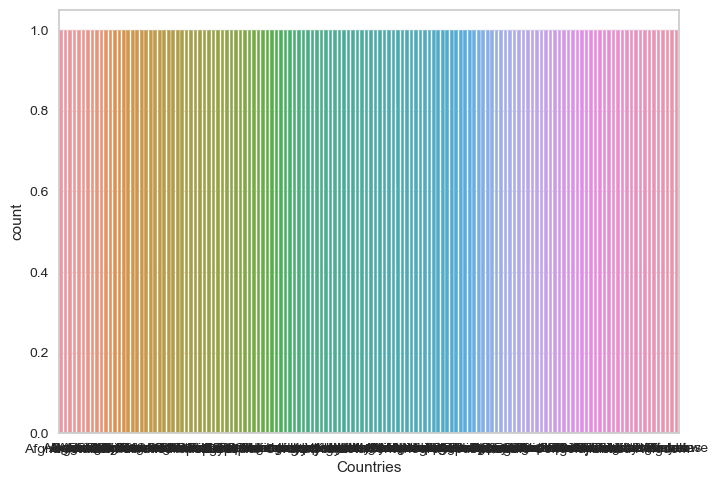

In [18]:
import seaborn as sns
sns.countplot(x=df.Countries)

In [19]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,138.000000,138.000000,138.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,76.362319,0.318841,4.000000,1.710145,2.934783,1.399363e+10,5.194983e+11,290.043478,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07,9.546746e+05,4874.456522,5464.130435,3705.688406
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,140.821984,1.804235,12.631787,9.154954,6.057157,6.731189e+10,1.847252e+12,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08,2.225571e+06,18603.336310,16494.534600,3764.917170
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000e+07,5.394000e+08,2.000000,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05,6.970000e+02,0.000000,0.000000,0.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,5.250000,0.000000,0.000000,0.000000,0.000000,3.255000e+08,9.361500e+09,33.500000,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06,8.455325e+04,49.750000,0.000000,1401.250000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,30.000000,0.000000,0.000000,0.000000,0.000000,2.100909e+09,3.997000e+10,68.000000,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07,3.054200e+05,793.000000,875.000000,2564.500000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,72.750000,0.000000,2.000000,0.000000,4.000000,6.957750e+09,1.830250e+11,150.750000,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07,7.929618e+05,2746.500000,3050.000000,5015.500000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,7.500000e+11,1.791000e+13,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09,1.709824e+07,202080.000000,110000.000000,22457.000000


## Modeling

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
## clustering
X = df.drop("Countries", axis=1) 


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

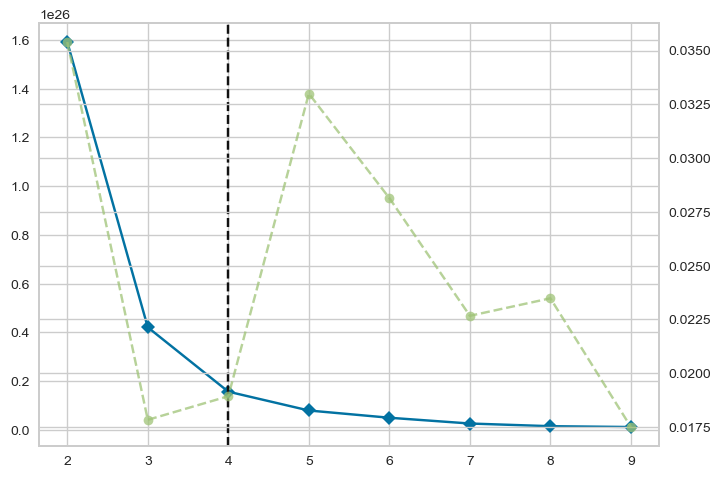

In [22]:
elb = KElbowVisualizer(KMeans(), k=(2, 10))
elb.fit(X)


In [23]:
elb.show()



<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model = KMeans(n_clusters=4, random_state=42)
model = model.fit(X)
pred = model.predict(X)

In [25]:
X["cluster"] = pred
df["cluster"] = pred

In [26]:
X.cluster.value_counts()

cluster
0    124
3      9
2      4
1      1
Name: count, dtype: int64

In [27]:
# df.groupby("cluster").mean()

In [28]:

silhouette_score(X, pred)

0.8671436271439987